`
Date:       03-03-2021
Params:      R0.9-0.98B13ATP2000MD2000S77T5.0
About:       Actin conformation 
Version:     v11n
Data source: /media/nitta/HDCZ-UT/NITTA-LAB HD3/Sam/V11n/dt1.0s5/SEED77MD3000
By:          Sam Macharia
`

In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import glob
%matplotlib inline

In [56]:
Filament_070 = glob.glob('data/S77/R070/Filament_t5S77R0.7Ts**.csv'); Filament_070 = sorted(Filament_070, key=lambda x:x [-8:])
MotorSpecie1_070 = glob.glob('data/S77/R070/MotorSpecie1_t5S77R0.7Ts**.csv'); MotorSpecie1_070 = sorted(MotorSpecie1_070, key=lambda x:x [-8:])
MotorSpecie2_070 = glob.glob('data/S77/R070/MotorSpecie2_t5S77R0.7Ts**.csv'); MotorSpecie2_070 = sorted(MotorSpecie2_070, key=lambda x:x [-8:])

Filament_090 = glob.glob('data/S77/R090/Filament_t5S77R0.9Ts**.csv'); Filament_090 = sorted(Filament_090, key=lambda x:x [-8:])
MotorSpecie1_090 = glob.glob('data/S77/R090/MotorSpecie1_t5S77R0.9Ts**.csv'); MotorSpecie1_090 = sorted(MotorSpecie1_090, key=lambda x:x [-8:])
MotorSpecie2_090 = glob.glob('data/S77/R090/MotorSpecie2_t5S77R0.9Ts**.csv'); MotorSpecie2_090 = sorted(MotorSpecie2_090, key=lambda x:x [-8:])

Filament_092 = glob.glob('data/S77/R092/Filament_t5S77R0.92Ts**.csv'); Filament_092 = sorted(Filament_092, key=lambda x:x [-8:])
MotorSpecie1_092 = glob.glob('data/S77/R092/MotorSpecie1_t5S77R0.92Ts**.csv'); MotorSpecie1_092 = sorted(MotorSpecie1_092, key=lambda x:x [-8:])
MotorSpecie2_092 = glob.glob('data/S77/R092/MotorSpecie2_t5S77R0.92Ts**.csv'); MotorSpecie2_092 = sorted(MotorSpecie2_092, key=lambda x:x [-8:])

Filament_098 = glob.glob('data/S77/R098/Filament_t5S77R0.98Ts**.csv'); Filament_098 = sorted(Filament_098, key=lambda x:x [-8:])
MotorSpecie1_098 = glob.glob('data/S77/R098/MotorSpecie1_t5S77R0.98Ts**.csv'); MotorSpecie1_098 = sorted(MotorSpecie1_098, key=lambda x:x [-8:])
MotorSpecie2_098 = glob.glob('data/S77/R098/MotorSpecie2_t5S77R0.98Ts**.csv'); MotorSpecie2_098 = sorted(MotorSpecie2_098, key=lambda x:x [-8:])

Filament_100 = glob.glob('data/S77/R100/Filament_t5S77R1.0Ts**.csv'); Filament_100 = sorted(Filament_100, key=lambda x:x [-8:])
MotorSpecie1_100 = glob.glob('data/S77/R100/MotorSpecie1_t5S77R1.0Ts**.csv'); MotorSpecie1_100 = sorted(MotorSpecie1_100, key=lambda x:x [-8:])
MotorSpecie2_100 = glob.glob('data/S77/R100/MotorSpecie2_t5S77R1.0Ts**.csv'); MotorSpecie2_100 = sorted(MotorSpecie2_100, key=lambda x:x [-8:])

In [57]:
f_070 = []; mt1_070 = []; mt2_070 = []
f_090 = []; mt1_090 = []; mt2_090 = []
f_092 = []; mt1_092 = []; mt2_092 = []
f_098 = []; mt1_098 = []; mt2_098 = []
f_100 = []; mt1_100 = []; mt2_100 = []

In [58]:
for i in Filament_070:
    f = pd.read_csv(i, names=['x','y','z'], skiprows=1)
    f_070.append(f)
for i in Filament_090:
    f = pd.read_csv(i, names=['x','y','z'], skiprows=1)
    f_090.append(f)
for i in Filament_092:
    f = pd.read_csv(i, names=['x','y','z'], skiprows=1)
    f_092.append(f)
for i in Filament_098:
    f = pd.read_csv(i, names=['x','y','z'], skiprows=1)
    f_098.append(f)
for i in Filament_100:
    f = pd.read_csv(i, names=['x','y','z'], skiprows=1)
    f_100.append(f)

In [59]:
for j in MotorSpecie1_070:
    mt1 = pd.read_csv(j, names=['x','y','z'], skiprows=1)
    mt1_070.append(mt1)
for j in MotorSpecie1_090:
    mt1 = pd.read_csv(j, names=['x','y','z'], skiprows=1)
    mt1_090.append(mt1)
for j in MotorSpecie1_092:
    mt1 = pd.read_csv(j, names=['x','y','z'], skiprows=1)
    mt1_092.append(mt1)
for j in MotorSpecie1_098:
    mt1 = pd.read_csv(j, names=['x','y','z'], skiprows=1)
    mt1_098.append(mt1)
for j in MotorSpecie1_100:
    mt1 = pd.read_csv(j, names=['x','y','z'], skiprows=1)
    mt1_100.append(mt1)

In [60]:
for k in MotorSpecie2_070:
    mt2 = pd.read_csv(k, names=['x','y','z'], skiprows=1)
    mt2_070.append(mt2)
for k in MotorSpecie2_090:
    mt2 = pd.read_csv(k, names=['x','y','z'], skiprows=1)
    mt2_090.append(mt2)
for k in MotorSpecie2_092:
    mt2 = pd.read_csv(k, names=['x','y','z'], skiprows=1)
    mt2_092.append(mt2)
for k in MotorSpecie2_098:
    mt2 = pd.read_csv(k, names=['x','y','z'], skiprows=1)
    mt2_098.append(mt2)
for k in MotorSpecie2_100:
    mt2 = pd.read_csv(k, names=['x','y','z'], skiprows=1)
    mt2_100.append(mt2)

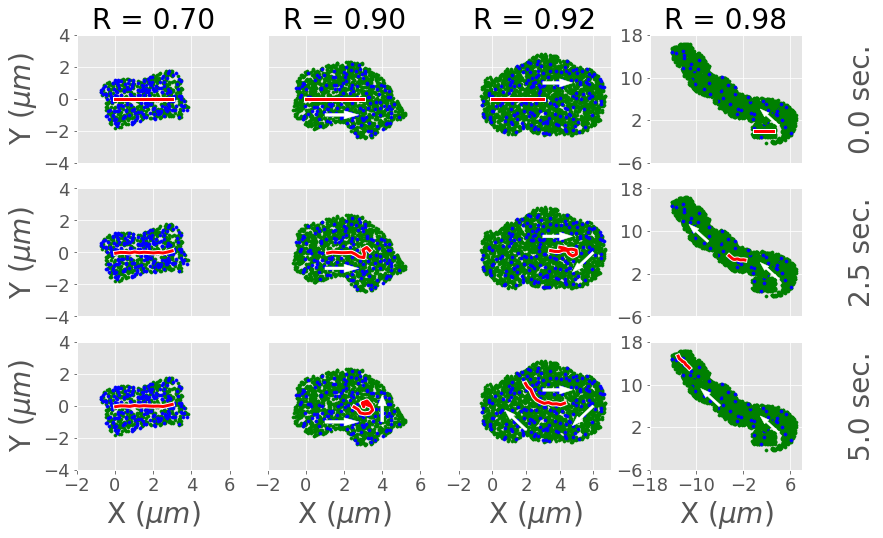

In [254]:
plt.figure(figsize=(13,8))
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(hspace=0.2)
plt.style.use('ggplot')
#plt.axes().set_aspect('equal')

jmp = 150
jmpx=40
jmpx2=50
fnt = 28
alp = 1#0.3
s = 10
strt = -2; end = 7; stp =2 
strty = -4; endy = 5; stpy =2 
strt2 = -18; end2 = 11; stp2 =8
strt2y = -6; end2y = 19; stp2y =8
rstp = 100
rstp2 = 100

plt.subplot(3,4,1)
fts = 0
# for i in np.arange(0,501,rstp2):
#     plt.scatter(mt1_070[i].iloc[0::jmp,:]['x'], mt1_070[i].iloc[0::jmp,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
#     plt.scatter(mt2_070[i].iloc[0::jmp,:]['x'], mt2_070[i].iloc[0::jmp,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)

plt.scatter(mt1_070[500].iloc[0::jmpx2,:]['x'], mt1_070[500].iloc[0::jmpx2,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
plt.scatter(mt2_070[500].iloc[0::jmpx2,:]['x'], mt2_070[500].iloc[0::jmpx2,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)    
    
plt.plot(f_070[fts]['x'],f_070[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.xticks(np.arange(strt,end,stp))
plt.yticks(np.arange(strty,endy,stpy))
plt.tick_params(labelsize=18)
plt.tick_params(axis='x', bottom=False, which='both', labelbottom=False)

plt.title('R = 0.70', fontsize=fnt) # , 0.5 sec.
plt.ylabel('Y ($\mu m$)', fontsize=28)
#======================================================
plt.subplot(3,4,5)
fts = 250
# for i in np.arange(0,501,rstp2):
#     plt.scatter(mt1_070[i].iloc[0::jmp,:]['x'], mt1_070[i].iloc[0::jmp,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
#     plt.scatter(mt2_070[i].iloc[0::jmp,:]['x'], mt2_070[i].iloc[0::jmp,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)

plt.scatter(mt1_070[500].iloc[0::jmpx2,:]['x'], mt1_070[500].iloc[0::jmpx2,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
plt.scatter(mt2_070[500].iloc[0::jmpx2,:]['x'], mt2_070[500].iloc[0::jmpx2,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)    
    
plt.plot(f_070[fts]['x'],f_070[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.xticks(np.arange(strt,end,stp))
plt.yticks(np.arange(strty,endy,stpy))
plt.tick_params(labelsize=18)
plt.tick_params(axis='x', bottom=False, which='both', labelbottom=False)

plt.ylabel('Y ($\mu m$)', fontsize=fnt)

#========================================================
plt.subplot(3,4,9)
fts = 500
# for i in np.arange(0,501,rstp2):
#     plt.scatter(mt1_070[i].iloc[0::jmp,:]['x'], mt1_070[i].iloc[0::jmp,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
#     plt.scatter(mt2_070[i].iloc[0::jmp,:]['x'], mt2_070[i].iloc[0::jmp,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)

plt.scatter(mt1_070[500].iloc[0::jmpx2,:]['x'], mt1_070[500].iloc[0::jmpx2,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
plt.scatter(mt2_070[500].iloc[0::jmpx2,:]['x'], mt2_070[500].iloc[0::jmpx2,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)
    
plt.plot(f_070[fts]['x'],f_070[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.xticks(np.arange(strt,end,stp))
plt.yticks(np.arange(strty,endy,stpy))
plt.tick_params(labelsize=18)

plt.xlabel('X ($\mu m$)', fontsize=28)
plt.ylabel('Y ($\mu m$)', fontsize=28)

#==========================================================================
plt.subplot(3,4,2)
fts = 0
# for i in np.arange(0,501,rstp2):
#     plt.scatter(mt1_090[i].iloc[0::jmp,:]['x'], mt1_090[i].iloc[0::jmp,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
#     plt.scatter(mt2_090[i].iloc[0::jmp,:]['x'], mt2_090[i].iloc[0::jmp,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)

plt.scatter(mt1_090[500].iloc[0::jmpx,:]['x'], mt1_090[500].iloc[0::jmpx,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
plt.scatter(mt2_090[500].iloc[0::jmpx,:]['x'], mt2_090[500].iloc[0::jmpx,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)      
    
plt.plot(f_090[fts]['x'],f_090[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(1,-1,1,0,width=0.17, color='white')
#plt.arrow(4,-1,0,1,width=0.15, color='white')

plt.xticks(np.arange(strt,end,stp))
plt.yticks(np.arange(strty,endy,stpy))
plt.tick_params(labelsize=18)
plt.tick_params(axis='y', left=False, which='both', labelleft=False)
plt.tick_params(axis='x', bottom=False, which='both', labelbottom=False)

plt.title('R = 0.90', fontsize=fnt) # , 0.5 sec.
#plt.ylabel('Y ($\mu m$)', fontsize=28)
#======================================================
plt.subplot(3,4,6)
fts = 250
# for i in np.arange(0,501,rstp2):
#     plt.scatter(mt1_090[i].iloc[0::jmp,:]['x'], mt1_090[i].iloc[0::jmp,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
#     plt.scatter(mt2_090[i].iloc[0::jmp,:]['x'], mt2_090[i].iloc[0::jmp,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)

plt.scatter(mt1_090[500].iloc[0::jmpx,:]['x'], mt1_090[500].iloc[0::jmpx,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
plt.scatter(mt2_090[500].iloc[0::jmpx,:]['x'], mt2_090[500].iloc[0::jmpx,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)      
    
plt.plot(f_090[fts]['x'],f_090[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(1,-1,1,0,width=0.17, color='white')
#plt.arrow(4,-1,0,1,width=0.15, color='white')

plt.xticks(np.arange(strt,end,stp))
plt.yticks(np.arange(strty,endy,stpy))
plt.tick_params(labelsize=18)
plt.tick_params(axis='y', left=False, which='both', labelleft=False)
plt.tick_params(axis='x', bottom=False, which='both', labelbottom=False)

#plt.ylabel('Y ($\mu m$)', fontsize=fnt)

#========================================================
plt.subplot(3,4,10)
fts = 500
# for i in np.arange(0,501,rstp2):
#     plt.scatter(mt1_090[i].iloc[0::jmp,:]['x'], mt1_090[i].iloc[0::jmp,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
#     plt.scatter(mt2_090[i].iloc[0::jmp,:]['x'], mt2_090[i].iloc[0::jmp,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)

plt.scatter(mt1_090[500].iloc[0::jmpx,:]['x'], mt1_090[500].iloc[0::jmpx,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
plt.scatter(mt2_090[500].iloc[0::jmpx,:]['x'], mt2_090[500].iloc[0::jmpx,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)    
    
plt.plot(f_090[fts]['x'],f_090[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(1,-1,1,0,width=0.17, color='white')
plt.arrow(4,-1,0,1,width=0.15, color='white')

plt.xticks(np.arange(strt,end,stp))
plt.yticks(np.arange(strty,endy,stpy))
plt.tick_params(labelsize=18)
plt.tick_params(axis='y', left=False, which='both', labelleft=False)

plt.xlabel('X ($\mu m$)', fontsize=28)
#plt.ylabel('Y ($\mu m$)', fontsize=28)

#==========================================================================

plt.subplot(3,4,3)
fts = 0
# for i in np.arange(0,501,rstp2):
#     plt.scatter(mt1_092[i].iloc[0::jmp,:]['x'], mt1_092[i].iloc[0::jmp,:]['y'],  marker='o', facecolor='green', s=s, color='green', alpha=alp)
#     plt.scatter(mt2_092[i].iloc[0::jmp,:]['x'], mt2_092[i].iloc[0::jmp,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)

plt.scatter(mt1_092[500].iloc[0::jmpx,:]['x'], mt1_092[500].iloc[0::jmpx,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
plt.scatter(mt2_092[500].iloc[0::jmpx,:]['x'], mt2_092[500].iloc[0::jmpx,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)     
    
plt.plot(f_092[fts]['x'],f_092[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(3,1,1,0,width=0.17, color='white')
#plt.arrow(6,0,-0.8,-0.8,width=0.14, color='white')
#plt.arrow(2,-1.5,-0.8,0.8,width=0.14, color='white')

plt.xticks(np.arange(strt,end,stp))
plt.yticks(np.arange(strty,endy,stpy))
plt.tick_params(labelsize=18)
plt.tick_params(axis='y', left=False, which='both', labelleft=False)
plt.tick_params(axis='x', bottom=False, which='both', labelbottom=False)

plt.title('R = 0.92', fontsize=fnt) # , 2.5 sec.

#============================================================
plt.subplot(3,4,7)
fts = 250
# for i in np.arange(0,501,rstp2):
#     plt.scatter(mt1_092[i].iloc[0::jmp,:]['x'], mt1_092[i].iloc[0::jmp,:]['y'],  marker='o', facecolor='green', s=s, color='green', alpha=alp)
#     plt.scatter(mt2_092[i].iloc[0::jmp,:]['x'], mt2_092[i].iloc[0::jmp,:]['y'],  marker='o', facecolor='blue', s=s, color='blue', alpha=alp)

plt.scatter(mt1_092[500].iloc[0::jmpx,:]['x'], mt1_092[500].iloc[0::jmpx,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
plt.scatter(mt2_092[500].iloc[0::jmpx,:]['x'], mt2_092[500].iloc[0::jmpx,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp) 
    
plt.plot(f_092[fts]['x'],f_092[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(3,1,1,0,width=0.17, color='white')
plt.arrow(6,0,-0.8,-0.8,width=0.14, color='white')
#plt.arrow(2,-1.5,-0.8,0.8,width=0.14, color='white')

plt.xticks(np.arange(strt,end,stp))
plt.yticks(np.arange(strty,endy,stpy))
plt.tick_params(labelsize=18)
plt.tick_params(axis='y', left=False, which='both', labelleft=False)
plt.tick_params(axis='x', bottom=False, which='both', labelbottom=False)

#=============================================================
plt.subplot(3,4,11)
fts = 500
# for i in np.arange(0,501,rstp2):
#     plt.scatter(mt1_092[i].iloc[0::jmp,:]['x'], mt1_092[i].iloc[0::jmp,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
#     plt.scatter(mt2_092[i].iloc[0::jmp,:]['x'], mt2_092[i].iloc[0::jmp,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)

plt.scatter(mt1_092[500].iloc[0::jmpx,:]['x'], mt1_092[500].iloc[0::jmpx,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
plt.scatter(mt2_092[500].iloc[0::jmpx,:]['x'], mt2_092[500].iloc[0::jmpx,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)    
    
plt.plot(f_092[fts]['x'],f_092[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(3,1,1,0,width=0.17, color='white')
plt.arrow(6,0,-0.8,-0.8,width=0.14, color='white')
plt.arrow(2,-1.5,-0.8,0.8,width=0.14, color='white')

plt.xticks(np.arange(strt,end,stp))
plt.yticks(np.arange(strty,endy,stpy))
plt.tick_params(labelsize=18)
plt.tick_params(axis='y', left=False, which='both', labelleft=False)

plt.xlabel('X ($\mu m$)', fontsize=fnt)

#====================================================================================

plt.subplot(3,4,4)
fts = 0
for i in np.arange(0,501,rstp):
    plt.scatter(mt1_098[i].iloc[0::jmp,:]['x'], mt1_098[i].iloc[0::jmp,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
    plt.scatter(mt2_098[i].iloc[0::jmp,:]['x'], mt2_098[i].iloc[0::jmp,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)

plt.plot(f_098[fts]['x'],f_098[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

#plt.arrow(-4,4,-2,2,width=0.4, color='white')
plt.arrow(4,1,-2,2,width=0.35, color='white')

plt.xticks(np.arange(strt2,end2,stp2))
plt.yticks(np.arange(strt2y,end2y,stp2y))
plt.tick_params(labelsize=18)
#plt.tick_params(axis='y', left=False, which='both', labelleft=False)
plt.tick_params(axis='x', bottom=False, which='both', labelbottom=False)

plt.title('R = 0.98', fontsize=fnt) # , 0 sec.

plt.ylabel('0.0 sec.', labelpad=-260, fontsize=fnt)

#================================================================
plt.subplot(3,4,8)
fts = 250
for i in np.arange(0,501,rstp):
    plt.scatter(mt1_098[i].iloc[0::jmp,:]['x'], mt1_098[i].iloc[0::jmp,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
    plt.scatter(mt2_098[i].iloc[0::jmp,:]['x'], mt2_098[i].iloc[0::jmp,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)

plt.plot(f_098[fts]['x'],f_098[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(-8,8,-2,2,width=0.4, color='white')
plt.arrow(4,1,-2,2,width=0.35, color='white')

plt.xticks(np.arange(strt2,end2,stp2))
plt.yticks(np.arange(strt2y,end2y,stp2y))
plt.tick_params(labelsize=18)
#plt.tick_params(axis='y', left=False, which='both', labelleft=False)
plt.tick_params(axis='x', bottom=False, which='both', labelbottom=False)

plt.ylabel('2.5 sec.', labelpad=-260, fontsize=fnt)

#===============================================================
plt.subplot(3,4,12)
fts = 500
for i in np.arange(0,501,rstp):
   plt.scatter(mt1_098[i].iloc[0::jmp,:]['x'], mt1_098[i].iloc[0::jmp,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
   plt.scatter(mt2_098[i].iloc[0::jmp,:]['x'], mt2_098[i].iloc[0::jmp,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)
# plt.scatter(mt1_098[250].iloc[0::jmp,:]['x'], mt1_098[250].iloc[0::jmp,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
# plt.scatter(mt2_098[250].iloc[0::jmp,:]['x'], mt2_098[250].iloc[0::jmp,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)
# plt.scatter(mt1_098[500].iloc[0::jmp,:]['x'], mt1_098[500].iloc[0::jmp,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
# plt.scatter(mt2_098[500].iloc[0::jmp,:]['x'], mt2_098[500].iloc[0::jmp,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)

plt.plot(f_098[fts]['x'],f_098[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(-6,6,-2,2,width=0.4, color='white')
plt.arrow(4,1,-2,2,width=0.35, color='white')

plt.xticks(np.arange(strt2,end2,stp2))
plt.yticks(np.arange(strt2y,end2y,stp2y))
plt.tick_params(labelsize=18)
#plt.tick_params(axis='y', left=False, which='both', labelleft=False)

#plt.annotate("", xy=(-4,-4), xytext=(0,0), arrowprops=dict(arrowstyle='->'), color='black')
#plt.arrow(-4,-4,-4,4,length_includes_head=True, head_width=1,head_length=1,color='k')


plt.ylabel('5.0 sec.', labelpad=-260, fontsize=fnt)

plt.xlabel('X ($\mu m$)', fontsize=28)

#plt.savefig('fig/afMyosinInteraction_R07_098t55s77.pdf', format='pdf', dpi=100, bbox_inches='tight')
#plt.savefig('fig/afMyosinInteraction_R07_098t55s77.svg', format='svg', dpi=100, bbox_inches='tight')
#import subprocess
#subprocess.call('inkscape fig/afMyosinInteraction_R07_098t55s77.svg -M fig/afMyosinInteraction_R07_098t55s77.emf', shell=True)
plt.show()

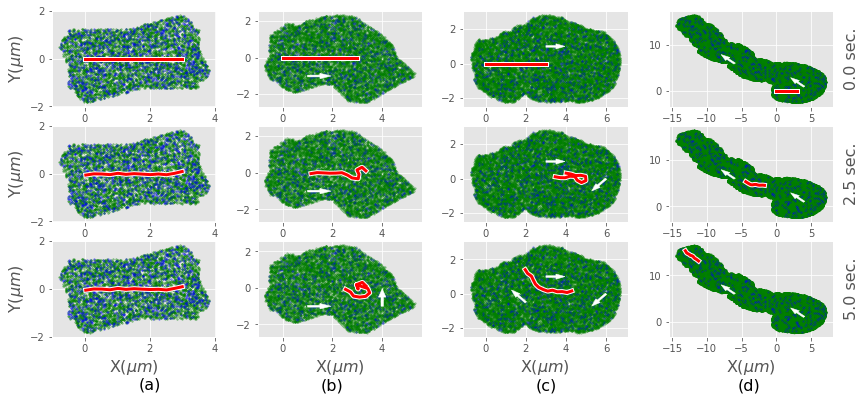

In [362]:
plt.figure(figsize=(14,6))
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(hspace=0.2)
plt.style.use('ggplot')
#plt.axes().set_aspect('equal')

jmp1 = 5; jmp2 = 10; jmp1x=10; jmp2x=20
fnt = 16
alp = 0.3; alp2 = 0.4

plt.subplot(3,4,1)
fts = 0; ts = 500
plt.scatter(mt1_070[ts].iloc[0::jmp1,:]['x'], mt1_070[ts].iloc[0::jmp1,:]['y'], marker='o', facecolor='green', s=3, color='green', alpha=alp2,rasterized=True)
plt.scatter(mt2_070[ts].iloc[0::jmp2,:]['x'], mt2_070[ts].iloc[0::jmp2,:]['y'], marker='o', facecolor='blue', s=3, color='blue', alpha=alp2,rasterized=True)
# plt.plot(f05[fts]['x'],f05[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=5,\
#          color='white', alpha=1, label='Actin filament')
plt.plot(f_070[fts]['x'],f_070[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])
plt.ylabel('Y($\mu m$)', fontsize=fnt)
#======================================================
plt.subplot(3,4,5)
fts = 250; ts = 500
plt.scatter(mt1_070[ts].iloc[0::jmp1,:]['x'], mt1_070[ts].iloc[0::jmp1,:]['y'], marker='o', facecolor='green', s=3, color='green', alpha=alp2,rasterized=True)
plt.scatter(mt2_070[ts].iloc[0::jmp2,:]['x'], mt2_070[ts].iloc[0::jmp2,:]['y'], marker='o', facecolor='blue', s=3, color='blue', alpha=alp2,rasterized=True)
plt.plot(f_070[fts]['x'],f_070[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])
plt.ylabel('Y($\mu m$)', fontsize=fnt)
#========================================================
plt.subplot(3,4,9)
fts = 500; ts = 500
plt.scatter(mt1_070[ts].iloc[0::jmp1,:]['x'], mt1_070[ts].iloc[0::jmp1,:]['y'], marker='o', facecolor='green', s=3, color='green', alpha=alp2,rasterized=True)
plt.scatter(mt2_070[ts].iloc[0::jmp2,:]['x'], mt2_070[ts].iloc[0::jmp2,:]['y'], marker='o', facecolor='blue', s=3, color='blue', alpha=alp2,rasterized=True)
plt.plot(f_070[fts]['x'],f_070[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.xlabel('X($\mu m$)', fontsize=fnt)
plt.ylabel('Y($\mu m$)', fontsize=fnt)
plt.text(2,-4.2,'(a)', ha='center', fontsize= 16)
#==========================================================================
#==========================================================================
plt.subplot(3,4,2)
fts = 0; ts = 500
plt.scatter(mt1_090[ts].iloc[0::jmp1,:]['x'], mt1_090[ts].iloc[0::jmp1,:]['y'], marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
plt.scatter(mt2_090[ts].iloc[0::jmp2,:]['x'], mt2_090[ts].iloc[0::jmp2,:]['y'], marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)
# plt.plot(f05[fts]['x'],f05[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=5,\
#          color='white', alpha=1, label='Actin filament')
plt.plot(f_090[fts]['x'],f_090[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(1,-1,0.5,0,width=0.1, color='white')
#plt.arrow(4,-1,0,0.5,width=0.1, color='white')

plt.xlabel('(a) 0.0 sec.', fontsize=fnt)
#======================================================
plt.subplot(3,4,6)
fts = 250; ts = 500
plt.scatter(mt1_090[ts].iloc[0::jmp1,:]['x'], mt1_090[ts].iloc[0::jmp1,:]['y'], marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
plt.scatter(mt2_090[ts].iloc[0::jmp2,:]['x'], mt2_090[ts].iloc[0::jmp2,:]['y'], marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)
plt.plot(f_090[fts]['x'],f_090[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(1,-1,0.5,0,width=0.1, color='white')
#plt.arrow(4,-1,0,0.5,width=0.1, color='white')

plt.xlabel('(b) 2.5 sec.', fontsize=fnt)
#========================================================
plt.subplot(3,4,10)
fts = 500; ts = 500
plt.scatter(mt1_090[ts].iloc[0::jmp1,:]['x'], mt1_090[ts].iloc[0::jmp1,:]['y'], marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
plt.scatter(mt2_090[ts].iloc[0::jmp2,:]['x'], mt2_090[ts].iloc[0::jmp2,:]['y'], marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)
plt.plot(f_090[fts]['x'],f_090[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(1,-1,0.5,0,width=0.1, color='white')
plt.arrow(4,-1,0,0.5,width=0.1, color='white')

plt.xlabel('X($\mu m$)', fontsize=fnt)
plt.text(2,-5.6,'(b)', ha='center', fontsize= 16)
#==========================================================================
#==========================================================================
plt.subplot(3,4,3)
fts = 0; ts = 500
plt.scatter(mt1_092[ts].iloc[0::jmp1,:]['x'], mt1_092[ts].iloc[0::jmp1,:]['y'], marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
plt.scatter(mt2_092[ts].iloc[0::jmp2,:]['x'], mt2_092[ts].iloc[0::jmp2,:]['y'], marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)
# plt.plot(f05[fts]['x'],f05[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=5,\
#          color='white', alpha=1, label='Actin filament')
plt.plot(f_092[fts]['x'],f_092[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(3,1,0.5,0,width=0.1, color='white')
#plt.arrow(6,0,-0.4,-0.4,width=0.1, color='white')
#plt.arrow(2,-0.5,-0.4,0.4,width=0.1, color='white')
#======================================================
plt.subplot(3,4,7)
fts = 250; ts = 500
plt.scatter(mt1_092[ts].iloc[0::jmp1,:]['x'], mt1_092[ts].iloc[0::jmp1,:]['y'], marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
plt.scatter(mt2_092[ts].iloc[0::jmp2,:]['x'], mt2_092[ts].iloc[0::jmp2,:]['y'], marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)
plt.plot(f_092[fts]['x'],f_092[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(3,1,0.5,0,width=0.1, color='white')
plt.arrow(6,0,-0.4,-0.4,width=0.1, color='white')
#plt.arrow(2,-0.5,-0.4,0.4,width=0.1, color='white')
#========================================================
plt.subplot(3,4,11)
fts = 500; ts = 500
plt.scatter(mt1_092[ts].iloc[0::jmp1,:]['x'], mt1_092[ts].iloc[0::jmp1,:]['y'], marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
plt.scatter(mt2_092[ts].iloc[0::jmp2,:]['x'], mt2_092[ts].iloc[0::jmp2,:]['y'], marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)
plt.plot(f_092[fts]['x'],f_092[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(3,1,0.5,0,width=0.1, color='white')
plt.arrow(6,0,-0.4,-0.4,width=0.1, color='white')
plt.arrow(2,-0.5,-0.4,0.4,width=0.1, color='white')

plt.xlabel('X($\mu m$)', fontsize=fnt)
plt.text(3,-5.6,'(c)', ha='center', fontsize= 16)
#==========================================================================
#==========================================================================
plt.subplot(3,4,4)
fts = 0; ts = 500
for ts0 in range(0,501,50):
    plt.scatter(mt1_098[ts0].iloc[0::jmp1x,:]['x'], mt1_098[ts0].iloc[0::jmp1x,:]['y'], marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
    plt.scatter(mt2_098[ts0].iloc[0::jmp2x,:]['x'], mt2_098[ts0].iloc[0::jmp2x,:]['y'], marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)

plt.plot(f_098[fts]['x'],f_098[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(-6,6,-1,1,width=0.3, color='white')
plt.arrow(4,1,-1,1,width=0.3, color='white')
plt.ylabel('0.0 sec.', labelpad=-210, fontsize=fnt)
#======================================================
plt.subplot(3,4,8)
fts = 250; ts = 500
for ts0 in range(0,501,50):
    plt.scatter(mt1_098[ts0].iloc[0::jmp1x,:]['x'], mt1_098[ts0].iloc[0::jmp1x,:]['y'], marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
    plt.scatter(mt2_098[ts0].iloc[0::jmp2x,:]['x'], mt2_098[ts0].iloc[0::jmp2x,:]['y'], marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)

plt.plot(f_098[fts]['x'],f_098[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(-6,6,-1,1,width=0.3, color='white')
plt.arrow(4,1,-1,1,width=0.3, color='white')
plt.ylabel('2.5 sec.', labelpad=-210, fontsize=fnt)
#========================================================
plt.subplot(3,4,12)
fts = 500; ts = 500; ts0=10

#for i in np.arange(0,501,rstp):
#    plt.scatter(mt1_098[i].iloc[0::jmp,:]['x'], mt1_098[i].iloc[0::jmp,:]['y'], marker='o', facecolor='green', s=s, color='green', alpha=alp)
#    plt.scatter(mt2_098[i].iloc[0::jmp,:]['x'], mt2_098[i].iloc[0::jmp,:]['y'], marker='o', facecolor='blue', s=s, color='blue', alpha=alp)
for ts0 in range(0,501,50):
    plt.scatter(mt1_098[ts0].iloc[0::jmp1x,:]['x'], mt1_098[ts0].iloc[0::jmp1x,:]['y'], marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
    plt.scatter(mt2_098[ts0].iloc[0::jmp2x,:]['x'], mt2_098[ts0].iloc[0::jmp2x,:]['y'], marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)
#plt.scatter(mt1_098[ts].iloc[0::jmp1,:]['x'], mt1_098[ts].iloc[0::jmp1,:]['y'], marker='o', facecolor='green', s=3, color='green', alpha=alp)
#plt.scatter(mt2_098[ts].iloc[0::jmp2,:]['x'], mt2_098[ts].iloc[0::jmp2,:]['y'], marker='o', facecolor='blue', s=3, color='blue', alpha=alp)
plt.plot(f_098[fts]['x'],f_098[fts]['y'], marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(-6,6,-1,1,width=0.3, color='white')
plt.arrow(4,1,-1,1,width=0.3, color='white')

plt.xlabel('X($\mu m$)', fontsize=fnt)
plt.ylabel('5.0 sec.', labelpad=-210, fontsize=fnt)
plt.text(-4,-15,'(d)', ha='center', fontsize= 16)

#==========================================================================

#plt.savefig('fig/afMyosinInteraction_R07_098t55s77.pdf', format='pdf', dpi=100, bbox_inches='tight')
#plt.savefig('fig/afMyosinInteraction_R07_098t55s77.svg', format='svg', dpi=100, bbox_inches='tight')
#plt.savefig('fig/afMyosinInteraction_R07_098t55s77.png', format='png', dpi=500, bbox_inches='tight')
#import subprocess
#subprocess.call('inkscape fig/afMyosinInteraction_R07_098t55s77.svg -M fig/afMyosinInteraction_R07_098t55s77.emf', shell=True)
plt.show()